# **Importing Libraries **

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading data**

In [ ]:
df = pd.read_csv('/content/youtubers_df.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [ ]:
df.set_index('Rank',inplace=True)

## **1) Exploring data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    1000 non-null   object 
 1   Categories  694 non-null    object 
 2   Suscribers  1000 non-null   float64
 3   Country     1000 non-null   object 
 4   Visits      1000 non-null   float64
 5   Likes       1000 non-null   float64
 6   Comments    1000 non-null   float64
 7   Links       1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 70.3+ KB


In [ ]:
df.columns

Index(['Username', 'Categories', 'Suscribers', 'Country', 'Visits', 'Likes',
       'Comments', 'Links'],
      dtype='object')

In [ ]:
df.dtypes

Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

## **Changing datatypes**

In [ ]:
df[['Suscribers', 'Visits', 'Likes', 'Comments']] = df[['Suscribers', 'Visits', 'Likes', 'Comments']].astype(int)

In [ ]:
df.dtypes

Username      object
Categories    object
Suscribers     int64
Country       object
Visits         int64
Likes          int64
Comments       int64
Links         object
dtype: object

In [ ]:
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)
df.rename(columns={'Username' : 'Streamer'},inplace=True)

In [ ]:
df.isnull().sum()

Streamer         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

## **Replacing null values of [Categories] with mode(Most repeated values)**

In [ ]:
df['Categories'].fillna(df['Categories'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Streamer       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

## **2) Trend analysis**

In [ ]:
df.head()

,Streamer,Categories,Subscribers,Country,Visits,Likes,Comments,Links
Rank,,,,,,,,
1,tseries,Música y baile,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
3,CoComelon,Educación,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,SETIndia,Música y baile,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


## **Top10 youtube streamers with subscribers**

In [ ]:
df.groupby('Streamer')['Subscribers'].sum().sort_values(ascending=False).head(10)

Streamer
tseries               249500000
MrBeast               183500000
CoComelon             165500000
SETIndia              162600000
KidsDianaShow         113500000
PewDiePie             111500000
LikeNastyaofficial    107500000
VladandNiki           101400000
zeemusiccompany        99700000
WWE                    97200000
Name: Subscribers, dtype: int64

### **Top10 youtube streamers with Views**

In [ ]:
df.groupby('Streamer')['Visits'].sum().sort_values(ascending=False).head(10)

Streamer
MrBeast                  117400000
MrBeast2                  83100000
DaFuqBoom                 52700000
VillageCookingChannel     21500000
BeastPhilanthropy         21500000
jaanvipatel               19100000
_vector_                  15400000
dojacat                   13600000
alfredolarin              12900000
NickPro                   12200000
Name: Visits, dtype: int64

### **Top15 Most popular categories**

In [ ]:
df['Categories'].value_counts().sort_values(ascending=False).head(15)

Categories
Música y baile               466
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Educación                     24
Animación                     22
Videojuegos                   19
Videojuegos, Humor            17
Música y baile, Animación     16
Name: count, dtype: int64

### **Correlation between no of Subscribers,Likes,Comments**

In [ ]:
correlation_matrix = df[['Subscribers', 'Likes', 'Comments']].corr()
correlation_matrix

,Subscribers,Likes,Comments
Subscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


### **3) Distribution of streamers audiences by country,category**

In [ ]:
df.groupby(["Country","Streamer","Categories"])["Subscribers"].sum().sort_values(ascending=False)

Country         Streamer       Categories         
India           tseries        Música y baile         249500000
Estados Unidos  MrBeast        Videojuegos, Humor     183500000
Unknown         CoComelon      Educación              165500000
India           SETIndia       Música y baile         162600000
Unknown         KidsDianaShow  Animación, Juguetes    113500000
                                                        ...    
Estados Unidos  cut            Humor                   11700000
                hamzymukbang   Música y baile          11700000
India           VYRLOriginals  Música y baile          11700000
Estados Unidos  BeAmazed       Educación               11700000
Colombia        MykeTowers     Música y baile          11700000
Name: Subscribers, Length: 994, dtype: int64

In [ ]:
df.head()

,Streamer,Categories,Subscribers,Country,Visits,Likes,Comments,Links
Rank,,,,,,,,
1,tseries,Música y baile,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
3,CoComelon,Educación,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,SETIndia,Música y baile,162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


### **4) Performance metrics**

In [ ]:
Avg_subs=df['Subscribers'].mean()
Avg_subs

21894399.987

In [ ]:
df['Visits'].mean()

1209446.315

In [ ]:
df['Likes'].mean()

53632.592

In [ ]:
df['Comments'].mean()

1288.768

### **5) Content categories**

In [ ]:
df.groupby('Categories')["Streamer"].count().sort_values(ascending=False)

Categories
Música y baile                        466
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Animación, Videojuegos                 34
Películas, Humor                       34
Animación, Juguetes                    29
Animación, Humor                       27
Educación                              24
Películas                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Juguetes                               10
Humor                                  10
Películas, Juguetes                     9
Deportes                                8
Películas, Videojuegos                  8
Música y baile, Humor                   6
Juguetes, Coches y vehí

### **6) Brands and collaborations**
### 7)** Streamers with above average performance

In [ ]:
Most_avg_values =df[df['Subscribers'] > df['Subscribers'].mean()]['Subscribers']
Most_avg_values

Rank
1      249500000
2      183500000
3      165500000
4      162600000
5      113500000
         ...    
299     21900000
300     21900000
301     21900000
302     21900000
303     21900000
Name: Subscribers, Length: 303, dtype: int64

In [ ]:
avg_subscribers_by_Streamer = df.groupby('Streamer')['Subscribers'].transform('mean')
avg_subscribers_by_Streamer

Rank
1       249500000.0
2       183500000.0
3       165500000.0
4       162600000.0
5       113500000.0
           ...     
996      11700000.0
997      11700000.0
998      11700000.0
999      11700000.0
1000     11700000.0
Name: Subscribers, Length: 1000, dtype: float64

In [ ]:
df['Subs Greater than avg'] = df['Subscribers'] > avg_subscribers_by_Streamer

In [ ]:
df_subs_above_avg = df[df['Subs Greater than avg'] == True]
df_subs_above_avg

,Streamer,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Subs Greater than avg
Rank,,,,,,,,,
451,thexoteam,Música y baile,17900000,Estados Unidos,772800,45000,185,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...,True


In [ ]:
Most_avg_likes = df[df['Likes'] > df['Likes'].mean()]['Likes']
Most_avg_likes

avg_likes_by_streamer = df.groupby('Streamer')['Likes'].transform('mean')

df['Likes Greater than avg'] = df['Likes'] > avg_likes_by_streamer

df_likes_above_avg = df[df['Likes Greater than avg'] == True]
df_likes_above_avg

,Streamer,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Subs Greater than avg,Likes Greater than avg
Rank,,,,,,,,,,
448,mgcplayhouse,"Juguetes, Coches y vehículos",17800000,Unknown,56300,96,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...,False,True
450,thexoteam,Música y baile,17800000,Estados Unidos,797600,50400,179,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...,False,True
950,Family-Box,Películas,12000000,Rusia,173600,6600,105,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...,False,True


In [ ]:
Most_avg_visits = df[df['Visits'] > df['Visits'].mean()]['Visits']
Most_avg_visits

avg_visits_by_streamer = df.groupby('Streamer')['Visits'].transform('mean')

df['Visits Greater than avg'] = df['Visits'] > avg_visits_by_streamer

df_visits_above_avg = df[df['Visits Greater than avg'] == True]
df_visits_above_avg

,Streamer,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Subs Greater than avg,Likes Greater than avg,Visits Greater than avg
Rank,,,,,,,,,,,
450,thexoteam,Música y baile,17800000,Estados Unidos,797600,50400,179,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...,False,True,True
452,mgcplayhouse,"Juguetes, Coches y vehículos",17800000,Unknown,63600,75,0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...,False,False,True
957,Family-Box,Películas,12000000,Rusia,177400,6300,86,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...,False,False,True


In [ ]:
Most_avg_comments = df[df['Comments'] > df['Comments'].mean()]['Comments']
Most_avg_comments

avg_comments_by_streamer = df.groupby('Streamer')['Comments'].transform('mean')

df['Comments Greater than avg'] = df['Comments'] > avg_comments_by_streamer

df_comments_above_avg = df[df['Comments Greater than avg'] == True]
df_comments_above_avg

,Streamer,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Subs Greater than avg,Likes Greater than avg,Visits Greater than avg,Comments Greater than avg
Rank,,,,,,,,,,,,
451,thexoteam,Música y baile,17900000,Estados Unidos,772800,45000,185,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...,True,False,False,True
950,Family-Box,Películas,12000000,Rusia,173600,6600,105,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...,False,True,False,True


In [ ]:
columns_to_replace = ['Subs Greater than avg', 'Likes Greater than avg', 'Visits Greater than avg', 'Comments Greater than avg']

for column in columns_to_replace:
    df[column] = df[column].replace({True: 1, False: 0})

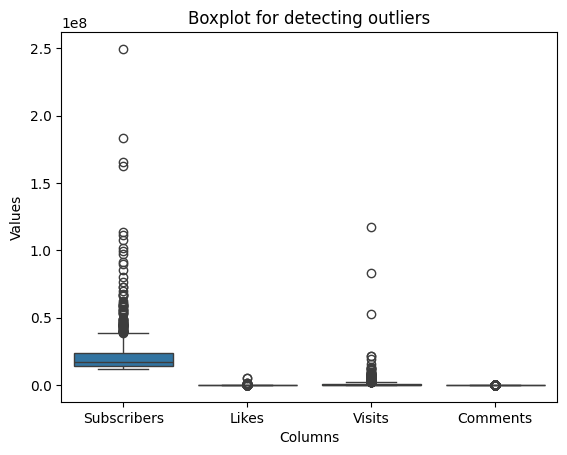

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ["Subscribers","Likes","Visits","Comments"]

sns.boxplot(data=df[columns_to_plot])

plt.title('Boxplot for detecting outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

<ipython-input-36-95b7cb144550>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscribers, y=categories, palette='viridis')


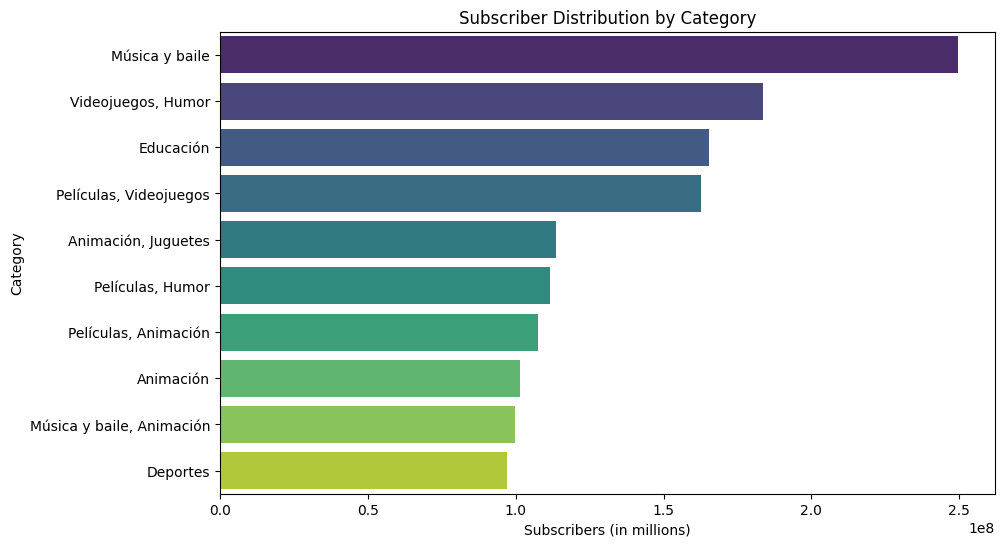

In [ ]:
streamers = ['T-Series', 'MrBeast', 'CoComelon', 'SETIndia', 'KidsDianaShow', 'PewDiePie', 'LikeNastyaofficial', 'VladandNiki', 'zeemusiccompany', 'WWE']
categories = ['Música y baile', 'Videojuegos, Humor', 'Educación', 'Películas, Videojuegos', 'Animación, Juguetes', 'Películas, Humor', 'Películas, Animación', 'Animación', 'Música y baile, Animación', 'Deportes']
subscribers = [249500000, 183500000, 165500000, 162600000, 113500000, 111500000, 107500000, 101400000, 99700000, 97200000]
country = ['India', 'Estados Unidos', 'Unknown', 'Unknown', 'Unknown', 'Estados Unidos', 'Unknown', 'Unknown', 'Unknown', 'Estados Unidos']
plt.figure(figsize=(10, 6))
sns.barplot(x=subscribers, y=categories, palette='viridis')
plt.title('Subscriber Distribution by Category')
plt.xlabel('Subscribers (in millions)')
plt.ylabel('Category')
plt.show()

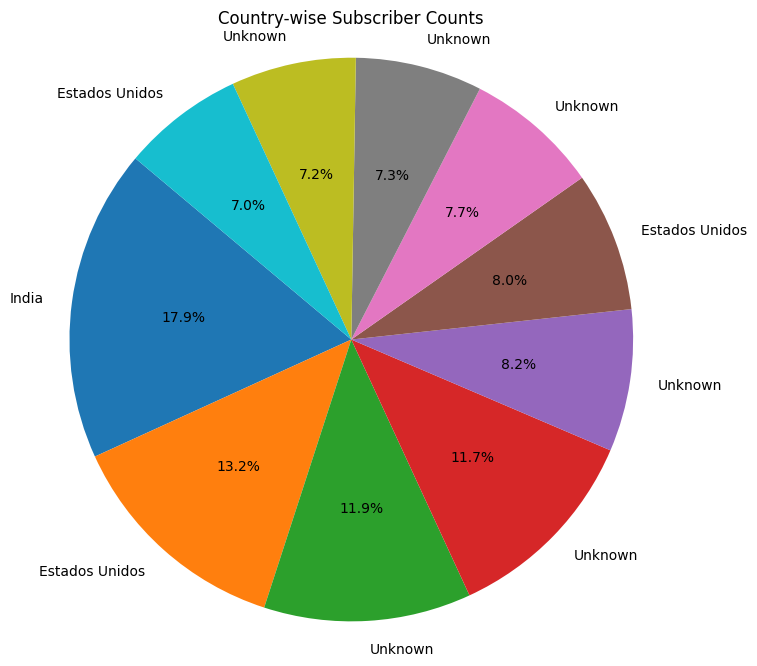

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(subscribers, labels=country, autopct='%1.1f%%', startangle=140)
plt.title('Country-wise Subscriber Counts')
plt.axis('equal')
plt.show()

### **8) Insights and recommendation**
-->Here are Top 10 Youtube Streamers with their subscribers:

Top 10 youtube channels with their link

In [ ]:
df.groupby(['Streamer','Links'])['Subscribers'].sum().sort_values(ascending=False).head(10)

Streamer            Links                                              
tseries             http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy4_brA    249500000
MrBeast             http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8uQQuVA    183500000
CoComelon           http://youtube.com/channel/UCbCmjCuTUZos6Inko4u57UQ    165500000
SETIndia            http://youtube.com/channel/UCpEhnqL0y41EpW2TvWAHD7Q    162600000
KidsDianaShow       http://youtube.com/channel/UCk8GzjMOrta8yxDcKfylJYw    113500000
PewDiePie           http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_AJ5Yw    111500000
LikeNastyaofficial  http://youtube.com/channel/UCJplp5SjeGSdVdwsfb9Q7lQ    107500000
VladandNiki         http://youtube.com/channel/UCvlE5gTbOvjiolFlEm-c_Ow    101400000
zeemusiccompany     http://youtube.com/channel/UCFFbwnve3yF62-tVXkTyHqg     99700000
WWE                 http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D3XoAg     97200000
Name: Subscribers, dtype: int64

### **Regional Preferences**
### **Countries with most no of subscribers**
### **Average number of subscribers, visits, likes, and comments.**
Average Subscribers: 21.89 million Average Visits: 1.21 million Average Likes: 53.63 thousand Average Comments: 1.29 thousand.

Categories with the Highest Number of Streamers:

Benchmarking performers

Outlier values

**While high subscriber counts can certainly attract brands, other factors like engagement rate, audience demographics, and content alignment with brand values also play crucial roles in determining collaboration opportunities. -->T-Series: 249.5 million MrBeast: 183.5 million CoComelon: 165.5 million SET India: 162.6 million Kids Diana Show: 113.5 million PewDiePie: 111.5 million Like Nastya Official: 107.5 million Vlad and Niki: 101.4 million Zee Music Company: 99.7 million WWE: 97.2 million With these youtube streamers we can promote brands,collaboration with related content field, and also we can do market campaigns.